In [32]:
#importing necessary liabrary
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [33]:
tf.__version__

'2.5.0'

In [34]:
fashion_mnist=keras.datasets.fashion_mnist

In [35]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
train_images.shape

(60000, 28, 28)

In [38]:
len(train_labels)

60000

In [39]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [40]:
test_images.shape

(10000, 28, 28)

In [41]:
len(test_images)

10000

In [42]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

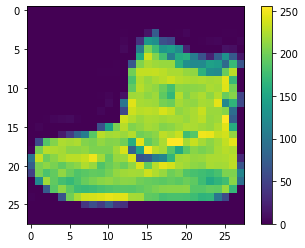

In [43]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

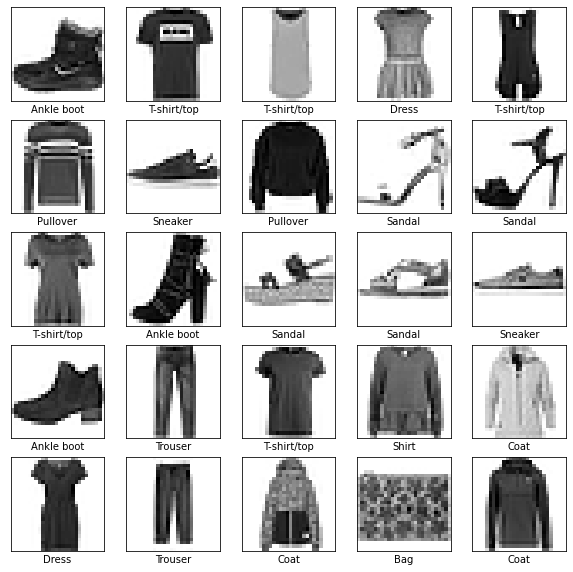

In [44]:
train_images= train_images/255.0
test_images= test_images/255.0

import matplotlib.pyplot as plt
%matplotlib inline

_=plt.figure(figsize=(10,10))
for i in range(25):
  _=plt.subplot(5,5,i+1)
  _=plt.xticks([])
  _=plt.yticks([])
  _=plt.grid('off')
  _=plt.imshow(train_images[i], cmap=plt.cm.binary)
  _=plt.xlabel(class_names[train_labels[i]])


In [45]:
model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128,activation=tf.nn.relu),
                         keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
model.fit(train_images,train_labels,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2466 - accuracy: 0.9074
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2388 - accuracy: 0.9117
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2307 - accuracy: 0.9140
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2242 - accuracy: 0.9161
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2175 - accuracy: 0.9183
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2116 - accuracy: 0.9209
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2066 - accuracy: 0.9230
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2014 - accuracy: 0.9235


In [52]:
test_loss, test_acc= model.evaluate(test_images,test_labels)
print('Test Accuarcy',test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3347 - accuracy: 0.8888
Test Accuarcy 0.8888000249862671


In [54]:
predictions=model.predict(test_images)
print(predictions[0])
test_labels[0]

[3.33385034e-12 2.13697918e-12 7.04302285e-12 2.36927186e-16
 1.74507674e-12 1.15367424e-04 4.69564838e-12 1.27218443e-03
 1.70829684e-09 9.98612404e-01]


9

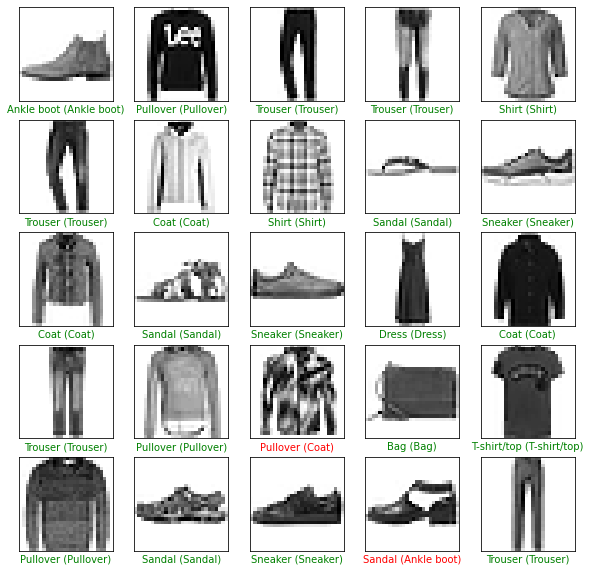

In [55]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
_=plt.figure(figsize=(10,10));
for i in range(25):
    _=plt.subplot(5,5,i+1);
    _=plt.xticks([]);
    _=plt.yticks([]);
    plt.grid('off');
    _=plt.imshow(test_images[i], cmap=plt.cm.binary);
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    _=plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color);